In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
medal_count = pd.read_excel(r'C:\Users\DELL\Desktop\BI & DA Projects\Pyhton Data Analyst projects\Olampic Tokyo- 2021\Medals.xlsx')
medal_count

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


### Estimates of Location

In [6]:
# Mean
medal_count['Total'].mean()

11.612903225806452

In [7]:
# Weighted Mean

np.average(medal_count['Total'],weights=medal_count['Gold'])

46.832352941176474

In [8]:
# Trimmed mean
from scipy.stats import trim_mean

trim_mean(medal_count['Gold'],0.1)

1.96

In [9]:
# Median

medal_count['Total'].median()

4.0

In [10]:
# Weighted Median 

def weighted_median(df, median_col,weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum()/2
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal_count, 'Total','Gold')

40

In [11]:
#  

q3 = np.percentile(medal_count['Total'],75)
q3

11.0

In [12]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


### Estimates of Variability (Dispersion Matrics)

In [13]:
# Deviation: The difference between the observed values and estimate of locations. Also called Errors or residuals
# variance : Square f the deviation form the mean, devide by n-1 where n is the number of instances

from statistics import variance

variance(medal_count['Gold'])

49.315100514259

In [14]:
# Standerd Deviation: Square root of the variance

from statistics import stdev

stdev(medal_count['Gold'])

7.022471111671376

In [15]:
# Mean absolute deviation: Mean of the absolute deviation from the mean, also known as  | 1-norm or Manhattan norm
# mean(absolute(X-mean(X)))

from numpy import mean, absolute 

mean(absolute(medal_count['Gold']-mean(medal_count['Gold'])))

4.0048560527228565

In [16]:
# Median absolute deviation: Median of the absolute deviation from the Median
# median(absolute(X-median(X)))

from numpy import median, absolute

median(absolute(medal_count['Gold']-median(medal_count['Gold'])))

1.0

In [17]:
# Rnage : Difference between the maximum and Minimum values in the dataset
# Order Statistics: Matrics based on the data value sorted from smallest to biggest
# Percentile : The value which is greater than P percent  of values in the dataset
# Interquartile Range: Difference between the 75th and 25th percentile
#q3 - q1 = np.percentile(data, [75,25])
#IQR = q3 - q1

q3, q1 = np.percentile(medal_count['Gold'],[75,25])
IQR = q3 - q1
IQR

3.0

### Exploring the Data Distribution

<AxesSubplot:>

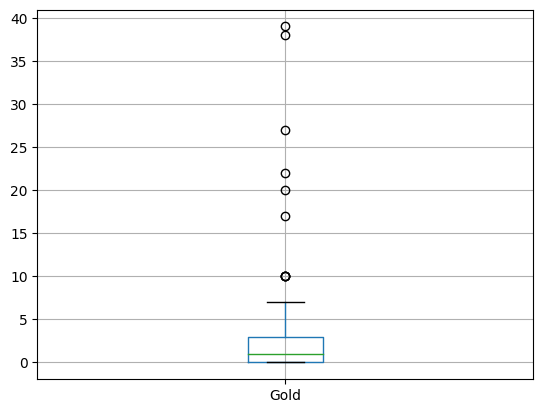

In [18]:
# Box Plot
# pd.Series.quantile([0.05,0.25,0.5,0.75,0.95])

medal_count.boxplot(column="Gold",by = None, ax=None)
# medal_count.boxplot(column="Total",by = None, ax=None)

In [19]:
# Frequency Table and Histograms
# pd.cut(pd.Series(), 10)

frequency_table = medal_count.copy()
frequency_table['freq'] = pd.cut(medal_count['Gold'], 10)
frequency_table.groupby('freq')['Rank'].count().reset_index()


,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <BarContainer object of 30 artists>)

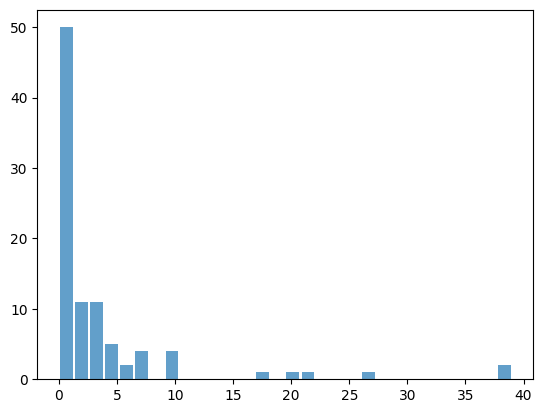

In [20]:
# Histogram
plt.hist(x = medal_count['Gold'], bins ='auto',alpha = 0.7, rwidth=0.85)

##### Statistical Moments
- 1st Moment is Location(mean)
- 2nd Moment is variability
- 3rd Moment is skewnwss
- 4th Moment is Kurtosis

Text(0.5, 0, 'Gold')

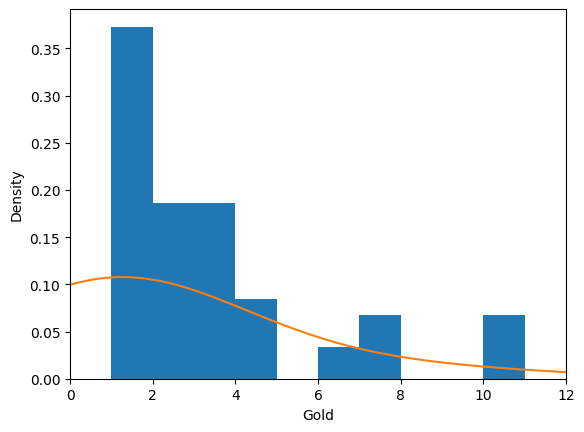

In [21]:
# Density Plot

ax = medal_count['Gold'].plot.hist(density = True,xlim = [0,12],bins=range(1,12))
medal_count['Gold'].plot.density(ax=ax)
ax.set_xlabel('Gold')

### Exploring Binary and Categorical Data

In [22]:
# Mode: Value that appears the most often
medal_count['Gold'].mode()

0    0
Name: Gold, dtype: int64

Text(0, 0.5, 'Country')

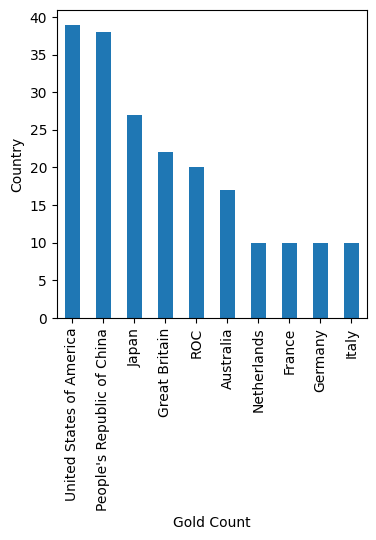

In [23]:
# Bar Chart

ax = medal_count.iloc[:10].plot.bar(x ='Team/NOC',y='Gold', figsize=(4,4),legend=False)
ax.set_xlabel('Gold Count')
ax.set_ylabel('Country')

([<matplotlib.patches.Wedge at 0xb3db029310>,
 [Text(-0.7155314051070093, 0.8354728052459811, 'United States of America'),
  Text(-0.9458998161617527, -0.5614922419634689, "People's Republic of China"),
  Text(0.15924203448189886, -1.0884125938512774, 'Japan'),
  Text(0.9458998161617524, -0.5614922419634694, 'Great Britain'),
  Text(1.0717821060885606, 0.247554270955622, 'ROC'),
  Text(0.6847227019531091, 0.8609034913566292, 'Australia'),
  Text(0.19865842661840455, 1.081912579432137, 'Netherlands')],
 [Text(-0.39028985733109595, 0.45571243922508053, '22.5%'),
  Text(-0.5159453542700468, -0.3062684956164376, '22.0%'),
  Text(0.0868592915355812, -0.5936795966461513, '15.6%'),
  Text(0.5159453542700467, -0.30626849561643776, '12.7%'),
  Text(0.5846084215028512, 0.13502960233943015, '11.6%'),
  Text(0.3734851101562413, 0.46958372255816133, '9.8%'),
  Text(0.10835914179185702, 0.590134134235711, '5.8%')])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000000B3D6646D30> (for post_execute):


KeyboardInterrupt: 

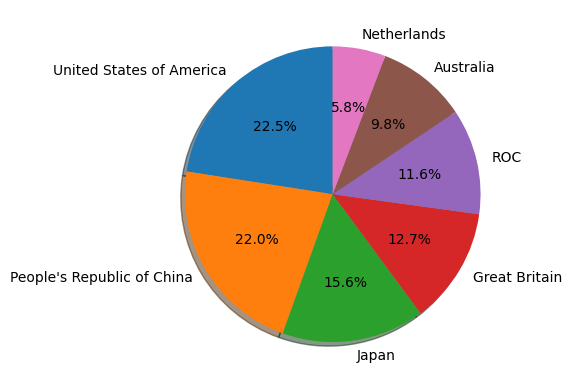

In [24]:
# Pie chart

pie_data = medal_count.iloc[:7, :]
plt.pie(pie_data['Gold'],labels=pie_data['Team/NOC'], autopct='%1.1f%%',shadow=True,startangle=90)

### Correlation

In [ ]:
# Correlation coefficiant: Generally use pearson's Correlation Coefficiant. The PCC is sensitive to outlier
# Correlation Matrix Show the correlation between all the 
# variables in the dataset. The primary diagonal will be 1's the entire way down

medal_count.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7252\4054788239.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  medal_count.corr()


,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

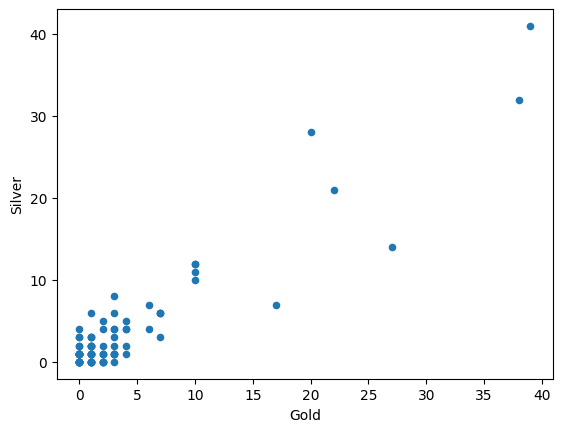

In [ ]:
# Scatter Plot
medal_count.plot.scatter(x='Gold',y='Silver')

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

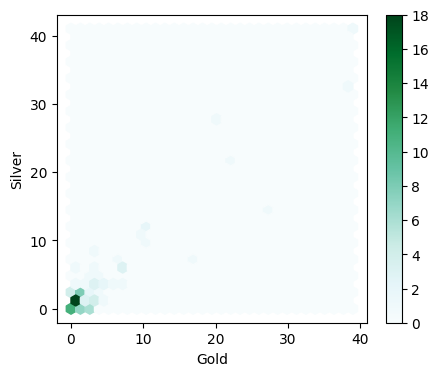

In [ ]:
# Hexagon plot
medal_count.plot.hexbin(x='Gold',y='Silver', gridsize=30,sharex=False,figsize=(5,4))

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

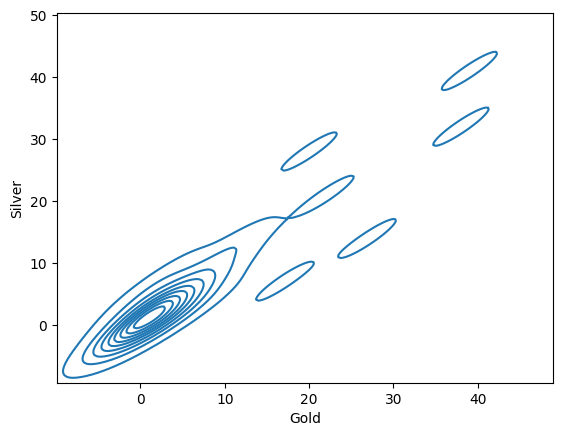

In [ ]:
# Countour plot
ax = sns.kdeplot(medal_count['Gold'], medal_count['Silver'])
ax

C:\Users\DELL\AppData\Local\Temp\ipykernel_7252\381350224.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(medal_count.corr())


<AxesSubplot:>

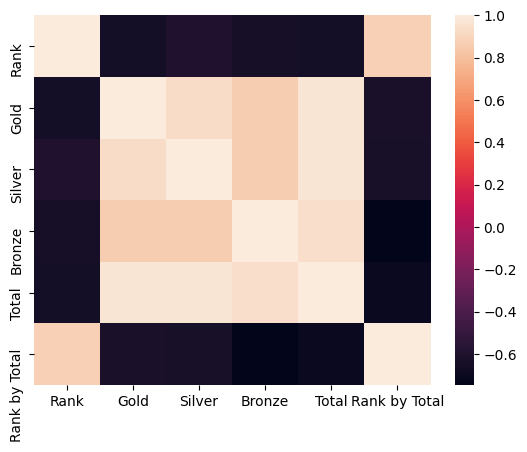

In [ ]:
# Heatmap plot

sns.heatmap(medal_count.corr())


In [ ]:
#Countigency Table

crosstab= medal_count[['Silver','Gold']].pivot_table(index='Silver',columns='Gold',aggfunc=lambda x:len(x), margins=True)
crosstab.fillna(0)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<AxesSubplot:xlabel='Gold'>

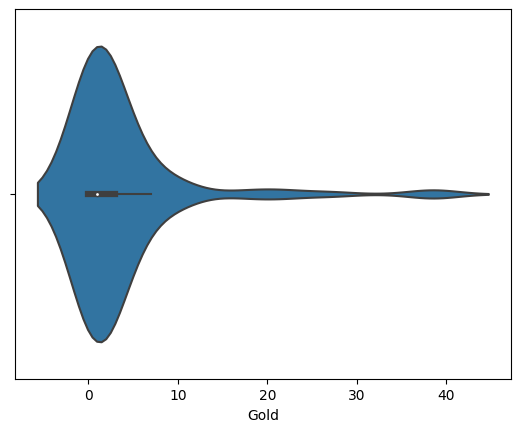

In [ ]:
# Voilin plot

sns.violinplot(x=medal_count['Gold'])

<AxesSubplot:>

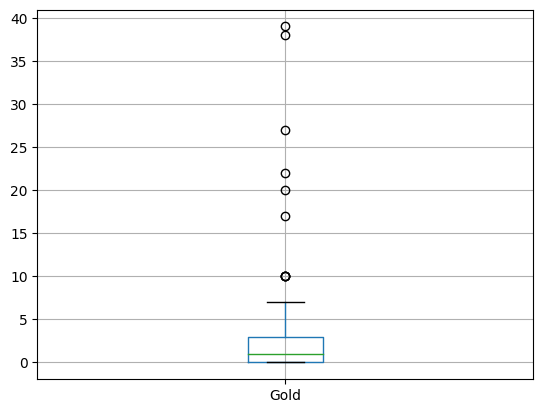

In [ ]:
medal_count.boxplot(column='Gold')

# Data Sampling and Distribution

In [25]:
player = pd.read_csv(r'C:\Users\DELL\Desktop\BI & DA Projects\Pyhton Data Analyst projects\Olampic Tokyo- 2021\players.csv')
player

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# Convert height into inches

player['height_inches']=player['height'].apply(lambda x: int(x.split('-')[0]) * 12 + int(x.split('-')[1]) if len(x.split('-'))==2 else int(x))
player

,nflId,height,weight,birthDate,collegeName,Position,displayName,height_inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73
...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73


<AxesSubplot:>

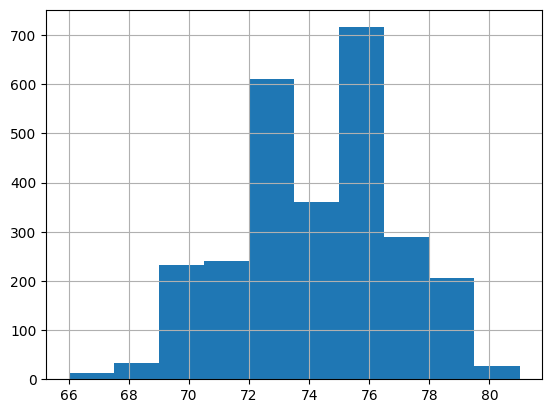

In [35]:
player['height_inches'].hist()

Text(0.5, 1.0, 'Central Limit Theorem')

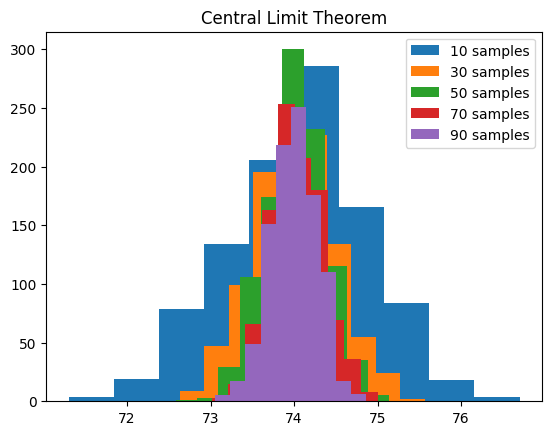

In [27]:
# Central Limit theorem

sample_amounts = range(10,100,20)

for x in sample_amounts:
    samples = []
    for i in range(1000):
        samples.append(player['height_inches'].sample(x).mean())
    plt.hist(samples)
plt.legend([str(z) + ' samples' for z in sample_amounts])
plt.title('Central Limit Theorem')

In [28]:
# Standerd Error

player['height_inches'].sem()

0.05065243293253027

In [29]:
# Bootstrap

from sklearn.utils import resample

results = []
for nrepeat in range(1000):
    sample = resample(player['height_inches'])
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics: ')
print(f'original: {player["height_inches"].median()}')
print(f'bias: {results.mean() - player["height_inches"].mean()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics: 
original: 74.0
bias: -0.010614934114201446
std. error: 0.0


In [30]:
resample(player['height_inches']).mean()

74.0117130307467

In [32]:
# Confidence intervals

import scipy.stats as st

#Define sample data
data = player['height_inches'].sample(20)

#create 95% confidence intervals for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data),scale=st.sem(data))

C:\Users\DELL\AppData\Local\Temp\ipykernel_2284\3846616717.py:9: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data),scale=st.sem(data))


(73.55020359143684, 76.14979640856315)

In [33]:
# define sample data
np.random.seed(0)
data = player['height_inches'].sample(1500)

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95,df=len(data)-1, loc=np.mean(data),scale=st.sem(data))

C:\Users\DELL\AppData\Local\Temp\ipykernel_2284\266341450.py:6: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95,df=len(data)-1, loc=np.mean(data),scale=st.sem(data))


(73.92579453716581, 74.1902054628342)

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

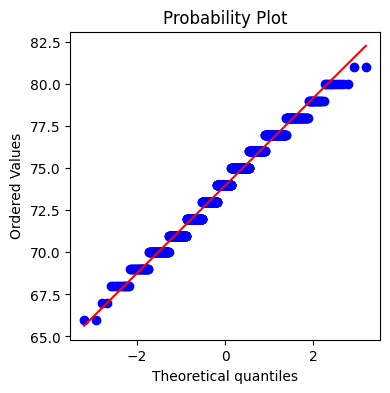

In [37]:
# Normal/Gaussian Distribution

from scipy import stats

fig, ax = plt.subplots(figsize=(4,4))
norm_sample = player['height_inches'].sample(1000)
stats.probplot(norm_sample, plot=ax)

### Statistics Signification Test

In [39]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math as mt
import statsmodels.api as sm
import random 
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
ab_test_data = pd.read_csv(r'C:\Users\DELL\Desktop\BI & DA Projects\Pyhton Data Analyst projects\Olampic Tokyo- 2021\ab_data_test.csv')
ab_test_data

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [51]:
i = ab_test_data[
    (
        (ab_test_data['group']=='treatment')
        == (ab_test_data['landing_page']=='new_page')
    )
    == False
].index

df2 = ab_test_data.drop(i)
df2['group_landing_page'] = df2['group'] + df2['landing_page']
df2

,user_id,timestamp,group,landing_page,converted,group_landing_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,controlold_page
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,controlold_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,treatmentnew_page
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,treatmentnew_page
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,controlold_page
...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,controlold_page
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,controlold_page
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,controlold_page
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,controlold_page


In [47]:
def permuntation_function(dataframe, data_col, grouping_col, iterations, statistic_function):
    output = {}

    groups = dataframe[grouping_col].value_counts().index
    values = dataframe[grouping_col].value_counts()

    for x in range(iterations):
        for i in groups:
            sample_amount = dataframe[grouping_col].value_counts()[i]
            sample_data = dataframe[data_col].sample(sample_amount, replace=False).to_list()
            sample_matric = statistic_function(sample_data)
            try:
                output[i].append(sample_matric)
            except(KeyError, AttributeError):
                output[i] = [sample_matric]

    final_output = pd.DataFrame(output)
    return final_output

In [54]:
permuntation_data = permuntation_function(df2, 'converted','group',5000, np.mean)
permuntation_data

KeyboardInterrupt: 

<AxesSubplot:>

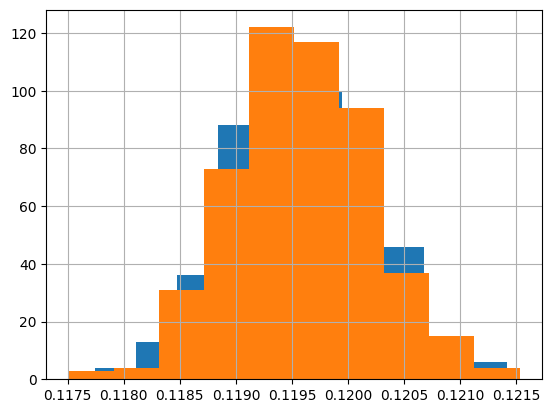

In [53]:
permuntation_data['treatment'].hist()
permuntation_data['control'].hist()

In [56]:
# T-Test (Lets alpha =0.05)
'''
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time,
            session_times[session_times.Page == 'Page B'].Time
            equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')
'''

res = st.ttest_ind(df2[df2['group']=='control']['converted'],
            df2[df2['group']=='treatment']['converted'],
            equal_var=False)

print(f'p-value for single sided test: {res.pvalue/2:.4f}')

p-value for single sided test: 0.0948


We get p-value 0.0948, Which is greater than the 0.05. we need reject the null hypothesis, so we Fail to Reject the Null Hypothesis.
In Order to the p-value to be more extream than our alpha value, we need it to be lower than it.

#### ANOVA TEST

- Combined data from all the groups together
- Shuffle and draw resamples for each group of the same size
- Record the mean of each group
- Record the variance among the means of the groups
- Repeat steps 2 - 4 many times

In [57]:
four_sessions = pd.read_csv(r'C:\Users\DELL\Desktop\BI & DA Projects\Pyhton Data Analyst projects\Olampic Tokyo- 2021\four_sessions.csv')
four_sessions

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172
5,Page 2,191
6,Page 3,193
7,Page 4,166
8,Page 1,177
9,Page 2,182


In [63]:
# ANOVA(Analysis of Variance) TEST

observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed means: ',four_sessions.groupby('Page').mean().values.ravel())
print('variance: ',observed_variance)

def perm_test(df):
    df =df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean.var()[0]

perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob',np.mean([var > observed_variance for var in perm_variance]))

Observed means:  [172.8 182.6 175.6 164.6]
variance:  55.426666666666655


AttributeError: 'function' object has no attribute 'var'

In [68]:
import statsmodels.formula.api as smf

model = smf.ols('Time ~ Page', data=four_sessions).fit()

aov_table = sm.stats.anova_lm(model)
print(aov_table)

res = st.f_oneway(four_sessions[four_sessions.Page == 'Page 1'].Time,
                 four_sessions[four_sessions.Page == 'Page 2'].Time,
                 four_sessions[four_sessions.Page == 'Page 3'].Time,
                 four_sessions[four_sessions.Page == 'Page 4'].Time)

print(f'F-Statistic: ,{res.statistic/2:.4f}')
print(f'p-value: ,{res.pvalue/2:.4f}')

            df  sum_sq     mean_sq         F    PR(>F)
Page       3.0   831.4  277.133333  2.739825  0.077586
Residual  16.0  1618.4  101.150000       NaN       NaN
F-Statistic: ,1.3699
p-value: ,0.0388


In [70]:
clicks_import = pd.read_csv(r'C:\Users\DELL\Desktop\BI & DA Projects\Pyhton Data Analyst projects\Olampic Tokyo- 2021\click_rates.csv')
clicks_import

,Headline,Click,Rate
0,Headline A,Click,14
1,Headline A,No-click,986
2,Headline B,Click,8
3,Headline B,No-click,992
4,Headline C,Click,12
5,Headline C,No-click,988


In [72]:
clicks = clicks_import.pivot(index='Click', columns='Headline', values='Rate')
clicks


Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


In [ ]:
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed,expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.appenf([observe - expect) ** 2/expect
        for observe in row])